In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise
import matplotlib.pyplot as plt
import seaborn as sns
import pyfolio as pf
%matplotlib inline

In [88]:
def metric(daily_ret):
    an_ret = pf.empyrical.annual_return(daily_ret)
    sharpe = pf.empyrical.sharpe_ratio(daily_ret)
    vol = pf.empyrical.annual_volatility(daily_ret)
    maxdraw = pf.empyrical.max_drawdown(daily_ret)
    print 'Annual return: %.2f%%'%(an_ret*100)
    print 'Sharpe ratio: %.2f'%(sharpe)
    print 'Annual volatility: %.2f%%'%(vol*100)
    print 'Max drawdown: %.2f%%'%(maxdraw*100)

In [63]:
df = pd.read_excel('./data/history.xlsx', index_col=0)

In [64]:
df.head()

,881001.WI,yield1y,yield10y,label,分类
2008-12-31,1430.7930,1.1020,2.7521,2,2.0
2009-01-31,1618.8582,1.0884,3.0368,2,NaN
2009-02-28,1711.6703,1.0119,3.1508,2,NaN
2009-03-31,2026.4078,0.9670,3.1612,2,NaN
2009-04-30,2126.0664,1.0006,3.1072,2,NaN


In [65]:
hdf = pd.read_excel('../data/assets.xlsx', index_col=0)

In [66]:
hdf.head()

,881001.WI,HSI.HI,SPX.GI,065.CS,AU9999.SGE,B.IPE,H11025.CSI
2007-01-04,1461.2643,20025.58,1418.34,116.1885,158.58,0.0,1019.2584
2007-01-05,1474.4288,20211.28,1409.71,116.2254,156.94,0.0,1019.3131
2007-01-08,1522.0564,20029.66,1412.84,116.2289,153.72,0.0,1019.4650
2007-01-09,1564.7432,19898.08,1412.11,116.2638,154.45,0.0,1019.5195
2007-01-10,1603.9025,19568.34,1414.85,116.2990,154.34,0.0,1019.5750


In [67]:
hdf = hdf[hdf['B.IPE'] != 0]

In [68]:
ret_df = hdf.pct_change().dropna()

In [69]:
ret_df = ret_df.merge(df[['label']], how='outer', left_index=True, right_index=True).fillna(method='ffill').loc[ret_df.index]

In [91]:
months = pd.Series(ret_df.index.map(lambda x: (x.year, x.month)), index=ret_df.index)
rebalance_dates = months.drop_duplicates(keep='first').index

In [92]:
weight = pd.DataFrame(columns=ret_df.columns[:-2], index=ret_df.index)
wb = np.zeros(ret_df.shape[1]-2)
for date in ret_df.index:
    weight.loc[date] = wb
    if date in rebalance_dates:
        label = ret_df.loc[date, 'label']
        past_return = ret_df[ret_df.index < date]
        past_return = past_return[past_return['label'] == label]
        risk_free = 0
        wb = 1. / -past_return[past_return < risk_free][past_return.columns[:-2]].sum()
#         print past_return[past_return < risk_free][past_return.columns[:-2]].sum()
        wb /= wb.sum()

In [93]:
weight.drop_duplicates()

,881001.WI,HSI.HI,SPX.GI,065.CS,AU9999.SGE,B.IPE
2010-10-26,0,0,0,0,0,0
2010-10-27,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-02,0.0341919,0.0252811,0.198426,0.59345,0.0663029,0.0823483
2010-12-02,0.048382,0.0638118,0.124046,0.564573,0.132257,0.0669293
2011-01-05,0.0377135,0.0517585,0.135804,0.606791,0.103654,0.0642791
2011-02-09,0.035579,0.0540959,0.12603,0.653465,0.0745683,0.0562614
2011-03-02,0.036935,0.0476669,0.115251,0.663818,0.0838359,0.0524934
2011-04-06,0.0357791,0.0428022,0.0799192,0.724162,0.075387,0.0419507
2011-05-04,0.0323609,0.0390839,0.073935,0.744825,0.07235,0.0374457
2011-06-02,0.0294686,0.0367677,0.0637374,0.779199,0.0633072,0.0275198


In [94]:
portfolio_ret = (weight * ret_df).sum(axis=1)

In [95]:
portfolio_ret = portfolio_ret[portfolio_ret != 0]

In [96]:
metric(portfolio_ret)

Annual return: 4.66%
Sharpe ratio: 1.80
Annual volatility: 2.58%
Max drawdown: -4.30%


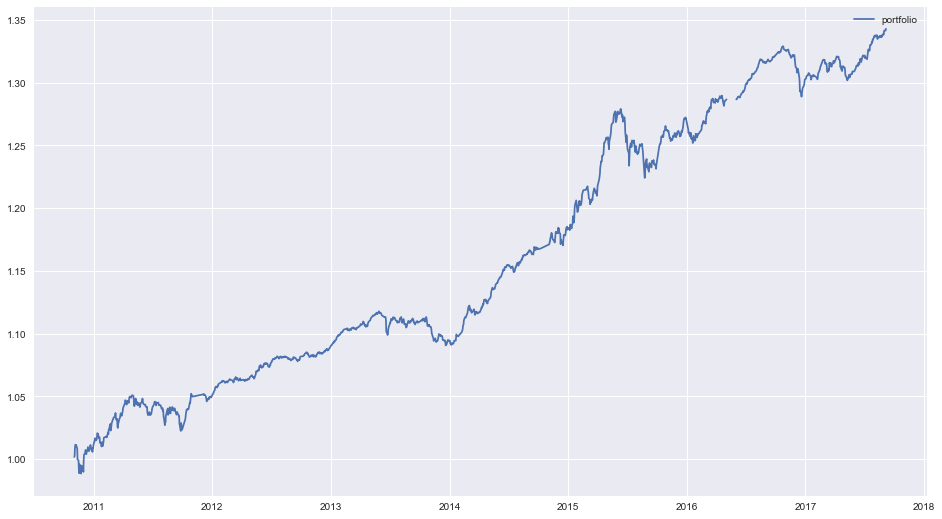

In [97]:
plt.figure(figsize=(16, 9))
plt.plot((1+portfolio_ret).cumprod(), label='portfolio')
plt.legend()